# Test model

In [1]:
import os.path
%load_ext autoreload
%autoreload 2

## Import libraries

In [25]:
import torch
from src.unet import UNet
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os

## Set parameters

In [3]:
model_path = 'models/unet_checkpoint_20250123_172425_epoch100.pth'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Load test data

In [4]:
from src.dataloader_anaglyph_reversed import make_dataloaders
import config_notebook as c

# Make dataloaders
testing_dl = make_dataloaders(path_anaglyph=c.TEST_ANAGLYPH_FILE, path_reversed=c.TEST_REVERSED_FILE)
print(len(testing_dl))

15


In [5]:
first_item = next(iter(testing_dl))
print(first_item['a'].shape)
print(first_item['r'].shape)

torch.Size([16, 3, 256, 256])
torch.Size([16, 3, 256, 256])


## Load model and set to evaluation mode

In [6]:
model = UNet()
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

UNet(
  (encoder1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=T

## Test model with metrics MSE, MAE, PSNR, SSIM

In [19]:
testing_run_timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
print (f"Started testing at {testing_run_timestamp}")

Started testing at 20250123_210211


In [20]:
# Test run to check if everything works
from test_model import test_model, set_global_config
import config_notebook_test_run

# Set train config
set_global_config(config_notebook_test_run)

single_item_dl = make_dataloaders(path_anaglyph=c.TEST_ANAGLYPH_FILE, path_reversed=c.TEST_REVERSED_FILE, files_limit=1)

test_model(model=model, test_dl=single_item_dl, device=device, timestamp=testing_run_timestamp)

Header written to ./results/test\testing_losses_unet_20250123_210211.csv


Testing: 100%|██████████| 1/1 [00:06<00:00,  6.67s/batch]

Test Results: Loss (MSE): 0.0007, Loss (MAE): 0.0181, Loss (SSIM): 0.0459, Loss (PSNR): -31.4861
Test results written to ./results/test\testing_losses_unet_20250123_210211.csv


In [10]:
from test_model import test_model, set_global_config
import config_notebook

# Set train config
set_global_config(config_notebook)

test_model(model=model, test_dl=testing_dl, device=device, timestamp=testing_run_timestamp)

Testing:  27%|██▋       | 4/15 [00:51<02:22, 12.94s/batch]


KeyboardInterrupt: 

## Plot the testing results

In [28]:
# import config_notebook as c
import config_notebook_test_run as c
csv_path = os.path.join(c.RESULTS_PATH, f"testing_losses_unet_{testing_run_timestamp}.csv")

# Read the CSV file
df = pd.read_csv(csv_path)

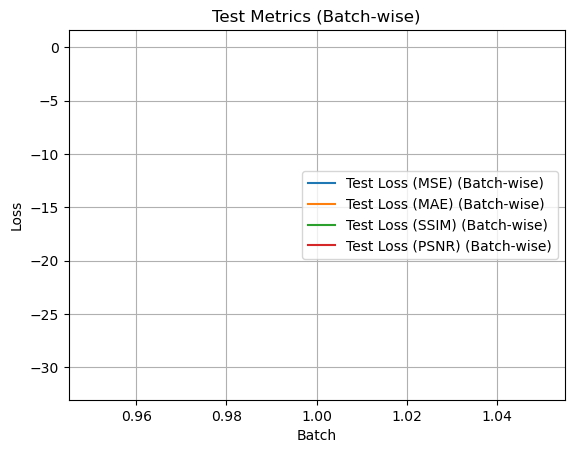

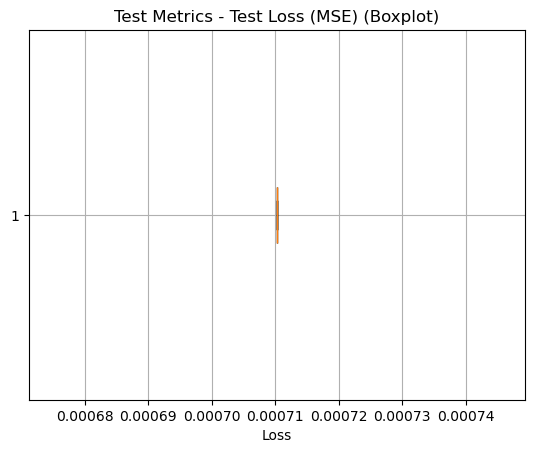

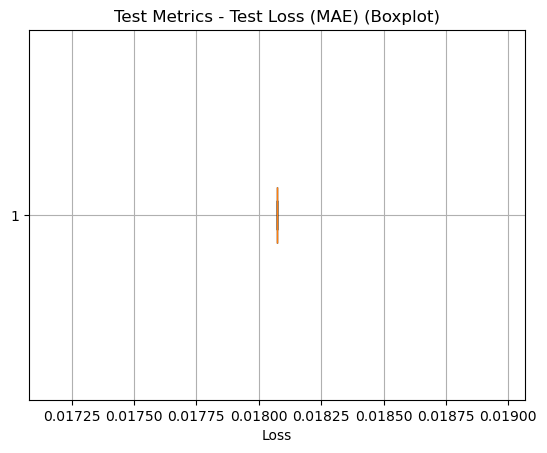

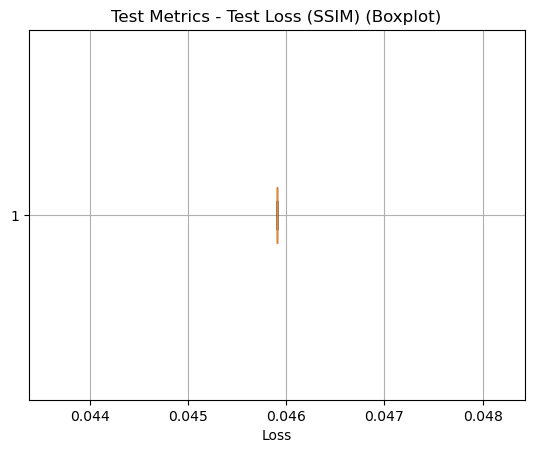

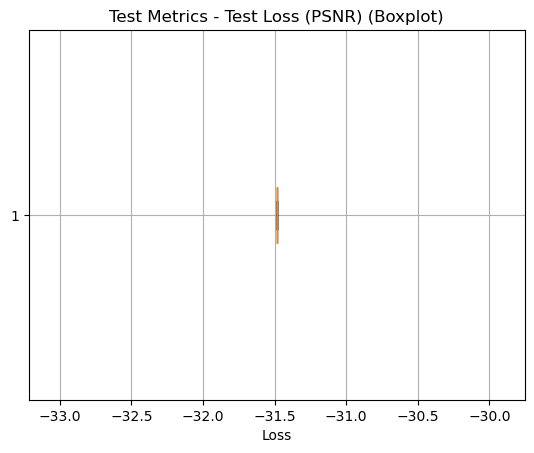

In [34]:

# Read the CSV file
df = pd.read_csv(csv_path)

# Plot all metrics for each batch in one graph
metrics = df.columns[1:]  # Skip the 'Batch' column
plt.figure()
for metric in metrics:
    plt.plot(df['Batch'], df[metric], label=f"{metric} (Batch-wise)")

# Add labels and title
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Test Metrics (Batch-wise)')
plt.legend()
plt.grid(True)
plt.show()

# Plot min, max, and average values for each metric using boxplots
for metric in metrics:
    plt.figure()
    plt.boxplot(df[metric], vert=False, patch_artist=True)
    plt.xlabel('Loss')
    plt.title(f'Test Metrics - {metric} (Boxplot)')
    plt.grid(True)
    plt.show()
